# Linear dynamical systems

In [1]:
import jax
import numpy as np
import jax.numpy as jnp
import seaborn as sns
from functools import partial
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.lines import Line2D

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
color = "#5A5A5A"

In [4]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (7.2, 4.0)

sns.set_palette("colorblind")

In [5]:
from matplotlib.gridspec import GridSpec

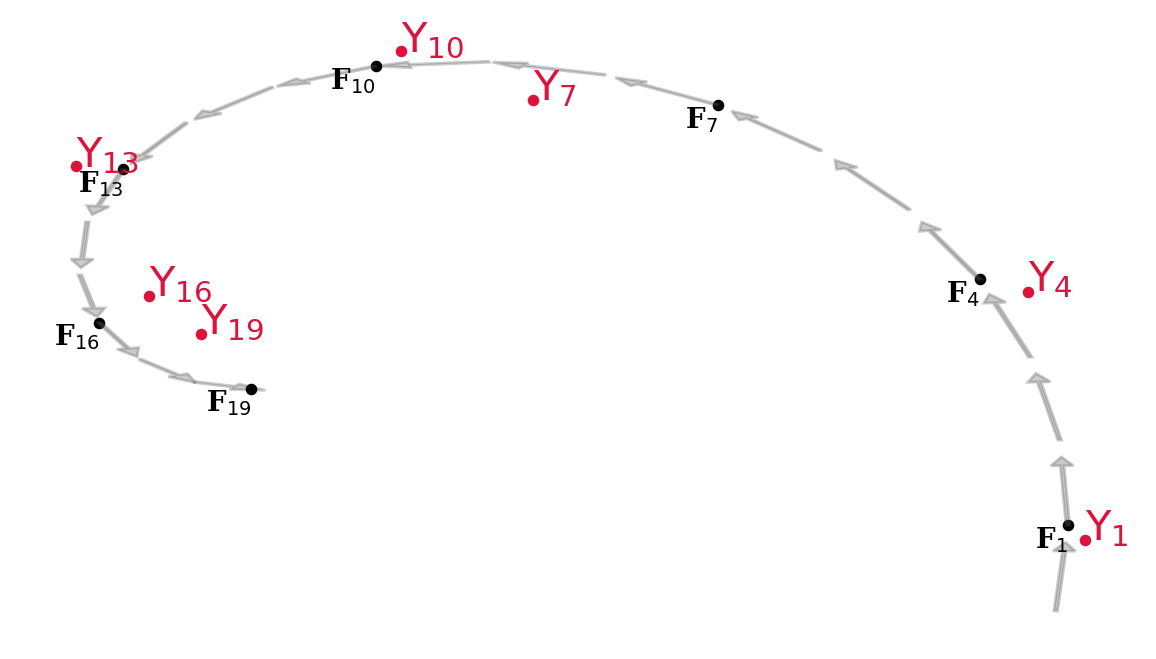

In [6]:
def f(x, t):
    x, y = x
    ẋ = -(x + y)
    ẏ = 6 * x - y
    return ẋ, ẏ
time = np.linspace(0, np.exp(2.6), 20)
time = np.exp(0.08163265) ** time
X = odeint(f, np.array([1.0, -1.5]), t=time)
# plt.scatter(*X.T, s=10, c="darkgray")

np.random.seed(3141)
for i, (init, end) in enumerate(zip(X[:-1], X[1:])):
    Δx = end - init
    plt.arrow(
        *init, *Δx * 0.7, head_width=0.03, edgecolor=None,
        width=0.005, alpha=0.3, color="#555555"
    )
    pos_clean = init + Δx
    pos_noise = pos_clean + np.random.randn(2) * 0.1
    if i in np.arange(0, 21, 3):
        hal = "right"
        plt.scatter(*pos_clean, c="black", s=10)
        plt.scatter(*pos_noise, c="crimson", s=10)
        plt.text(*pos_clean, r"F$_{"f"{i+1}""}$",
                 horizontalalignment=hal,
                 verticalalignment="top",
                 fontsize=10,
                 family="serif",
                 weight="bold"
                )
        plt.text(*pos_noise, r"Y$_{"f"{i+1}""}$", horizontalalignment="left", color="crimson")
plt.grid(alpha=0.3)
plt.axis("off");
# plt.savefig("./discrete-dynamical-system.png", dpi=200, bbox_inches="tight")

In [118]:
r"$\boldsymbol\theta_{"f"{count}""}$"

'$\\boldsymbol\\theta_{7}$'

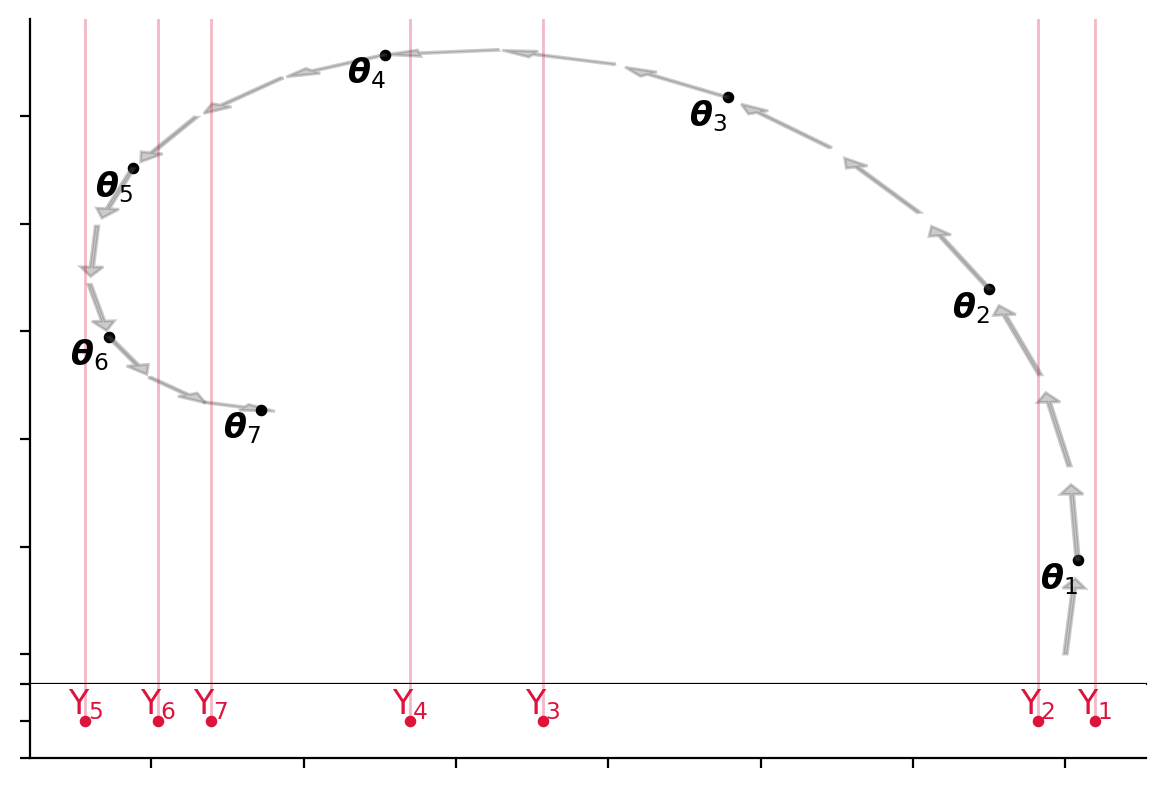

In [121]:
def f(x, t):
    x, y = x
    ẋ = -(x + y)
    ẏ = 6 * x - y
    return ẋ, ẏ
time = np.linspace(0, np.exp(2.6), 20)
time = np.exp(0.08163265) ** time
X = odeint(f, np.array([1.0, -1.5]), t=time)
# plt.scatter(*X.T, s=10, c="darkgray")

fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(2, 1, height_ratios=[0.9, 0.1], hspace=0.0)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)

ax_top.tick_params(labelbottom=False)
ax_top.tick_params(labelleft=False)
ax_bottom.tick_params(labelbottom=False)
ax_bottom.tick_params(labelleft=False)

np.random.seed(3141)


count = 0
for i, (init, end) in enumerate(zip(X[:-1], X[1:])):
    Δx = end - init
    ax_top.arrow(
        *init, *Δx * 0.7, head_width=0.03, edgecolor=None,
        width=0.005, alpha=0.3, color="#555555"
    )
    pos_clean = init + Δx
    pos_noise = pos_clean + np.random.randn(2) * 0.1
    if i in np.arange(0, 21, 3):
        count += 1
        hal = "right"
        ax_top.scatter(*pos_clean, c="black", s=10)
        ax_bottom.scatter(pos_noise[0], 0, c="crimson", s=10)
        
        ax_top.axvline(x=pos_noise[0], c="crimson", linewidth=1, alpha=0.3)
        ax_bottom.axvline(x=pos_noise[0], ymin=0.5, c="crimson", linewidth=1, alpha=0.3)
        
        # ax_top.scatter(*pos_noise, c="crimson", s=10)
        label = r"$\boldsymbol{\theta}_{"f"{count}""}$"
        ax_top.text(*pos_clean, label,
                 horizontalalignment=hal,
                 verticalalignment="top",
                 fontsize=12,
                 family="serif",
                 weight="bold"
                )

        ax_bottom.text(pos_noise[0], 0.01, r"Y$_{"f"{count}""}$",
                       horizontalalignment="center",
                       verticalalignment="bottom",
                       color="crimson",
                       fontsize=12,)

ax_bottom.set_ylim(-1,1)
# ax_top.grid(alpha=0.3)
# ax_bottom.grid(alpha=0.3)
# plt.axis("off");
# plt.tight_layout()
plt.savefig("./discrete-dynamical-system.png", dpi=300, bbox_inches="tight")

## Animating

In [122]:
from matplotlib.animation import FuncAnimation

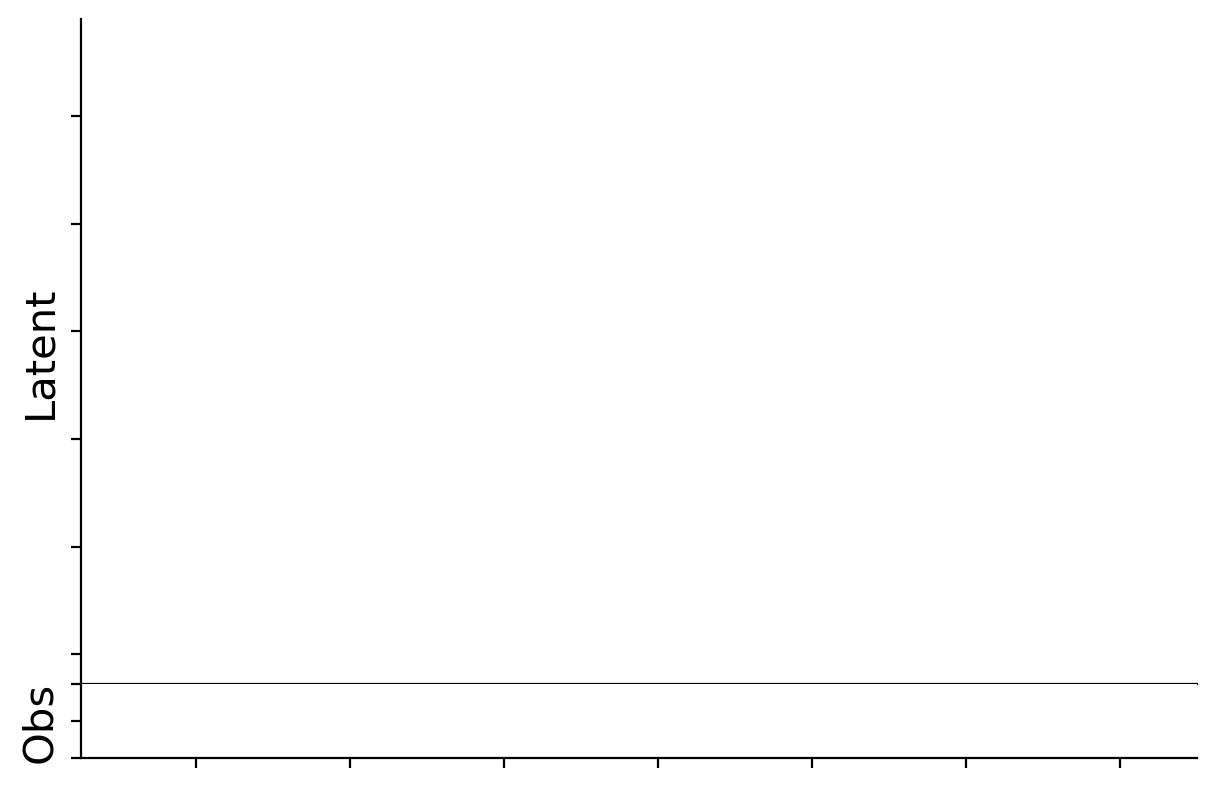

In [123]:
def f(x, t):
    x, y = x
    ẋ = -(x + y)
    ẏ = 6 * x - y
    return ẋ, ẏ
time = np.linspace(0, np.exp(2.6), 20)
time = np.exp(0.08163265) ** time
X = odeint(f, np.array([1.0, -1.5]), t=time)
# plt.scatter(*X.T, s=10, c="darkgray")

fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(2, 1, height_ratios=[0.9, 0.1], hspace=0.0)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)



frames = list(zip(X[:-1], X[1:]))

def animate(n_frames, key=3141):
    np.random.seed(key)
    ax_top.cla()
    ax_bottom.cla()

    ax_top.tick_params(labelbottom=False)
    ax_top.tick_params(labelleft=False)
    ax_bottom.tick_params(labelbottom=False)
    ax_bottom.tick_params(labelleft=False)

    ax_bottom.set_ylabel("Obs")
    ax_top.set_ylabel("Latent")

    count = 0
    for i, (init, end) in enumerate(frames[:n_frames]):
        Δx = end - init
        ax_top.arrow(
            *init, *Δx * 0.7, head_width=0.03, edgecolor=None,
            width=0.005, alpha=0.3, color="#555555"
        )
        pos_clean = init + Δx
        pos_noise = pos_clean + np.random.randn(2) * 0.1
        if i in np.arange(0, n_frames, 2):
            count += 1
            hal = "right"
            ax_top.scatter(*pos_clean, c="black", s=10)
            ax_bottom.scatter(pos_noise[0], 0, c="crimson", s=10)
            
            ax_top.axvline(x=pos_noise[0], c="crimson", linewidth=1, alpha=0.3)
            ax_bottom.axvline(x=pos_noise[0], ymin=0.5, c="crimson", linewidth=1, alpha=0.3)
            
            # ax_top.scatter(*pos_noise, c="crimson", s=10)
            label = r"$\boldsymbol{\theta}_{"f"{count}""}$"
            ax_top.text(*pos_clean, label,
                     horizontalalignment=hal,
                     verticalalignment="top",
                     fontsize=12,
                     family="serif",
                     weight="bold"
                    )
    
            ax_bottom.text(pos_noise[0], 0.01, r"Y$_{"f"{count}""}$",
                           horizontalalignment="center",
                           verticalalignment="bottom",
                           color="crimson",
                           fontsize=12,)
    
    ax_bottom.set_ylim(-1,1)
    ax_top.set_ylim(-1.64062466, 1.4511007)
    ax_top.set_xlim(-0.35, 1.10)
    ax_bottom.set_xlim(-0.35, 1.10)

animation = FuncAnimation(fig, partial(animate, key=10), np.arange(20))
animation.save("animation.gif", fps=2)

# animate(20, key=10)

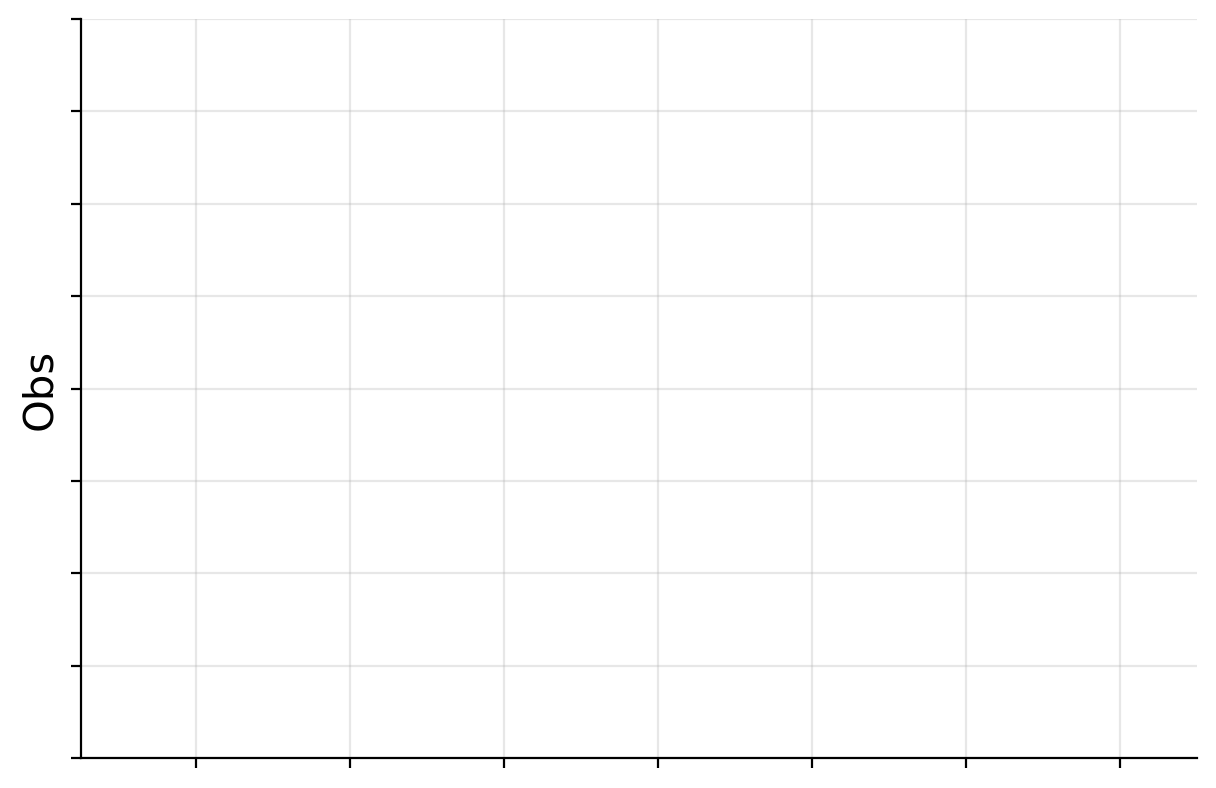

In [109]:
def f(x, t):
    x, y = x
    ẋ = -(x + y)
    ẏ = 6 * x - y
    return ẋ, ẏ
time = np.linspace(0, np.exp(2.6), 20)
time = np.exp(0.08163265) ** time
X = odeint(f, np.array([1.0, -1.5]), t=time)
# plt.scatter(*X.T, s=10, c="darkgray")

fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(1, 1, height_ratios=[1.0], hspace=0.0)
ax_bottom = fig.add_subplot(gs[0])



frames = list(zip(X[:-1], X[1:]))

def animate(n_frames, key=3141):
    np.random.seed(key)
    ax_bottom.cla()

    ax_bottom.tick_params(labelbottom=False)
    ax_bottom.tick_params(labelleft=False)

    ax_bottom.set_ylabel("Obs")
    
    count = 0
    for i, (init, end) in enumerate(frames[:n_frames]):
        Δx = end - init
        pos_clean = init + Δx
        pos_noise = pos_clean + np.random.randn(2) * 0.1
        if i in np.arange(0, n_frames, 2):
            count += 1
            hal = "right"
            ax_bottom.scatter(pos_noise[0], 0, c="crimson", s=10)
            
            ax_bottom.axvspan(xmin=pos_noise[0] - 0.01, xmax=pos_noise[0] + 0.01, color="crimson", alpha=0.1)
                
            ax_bottom.text(pos_noise[0], 0.01, r"Y$_{"f"{count}""}$",
                           horizontalalignment="center",
                           verticalalignment="bottom",
                           color="crimson",
                           fontsize=12,)
    
    ax_bottom.set_ylim(-1,1)
    ax_bottom.set_xlim(-0.35, 1.10)
    ax_bottom.grid(alpha=0.3)

animation = FuncAnimation(fig, partial(animate, key=10), np.arange(20))
animation.save("animation-obs.gif", fps=2)

# animate(20, key=10)

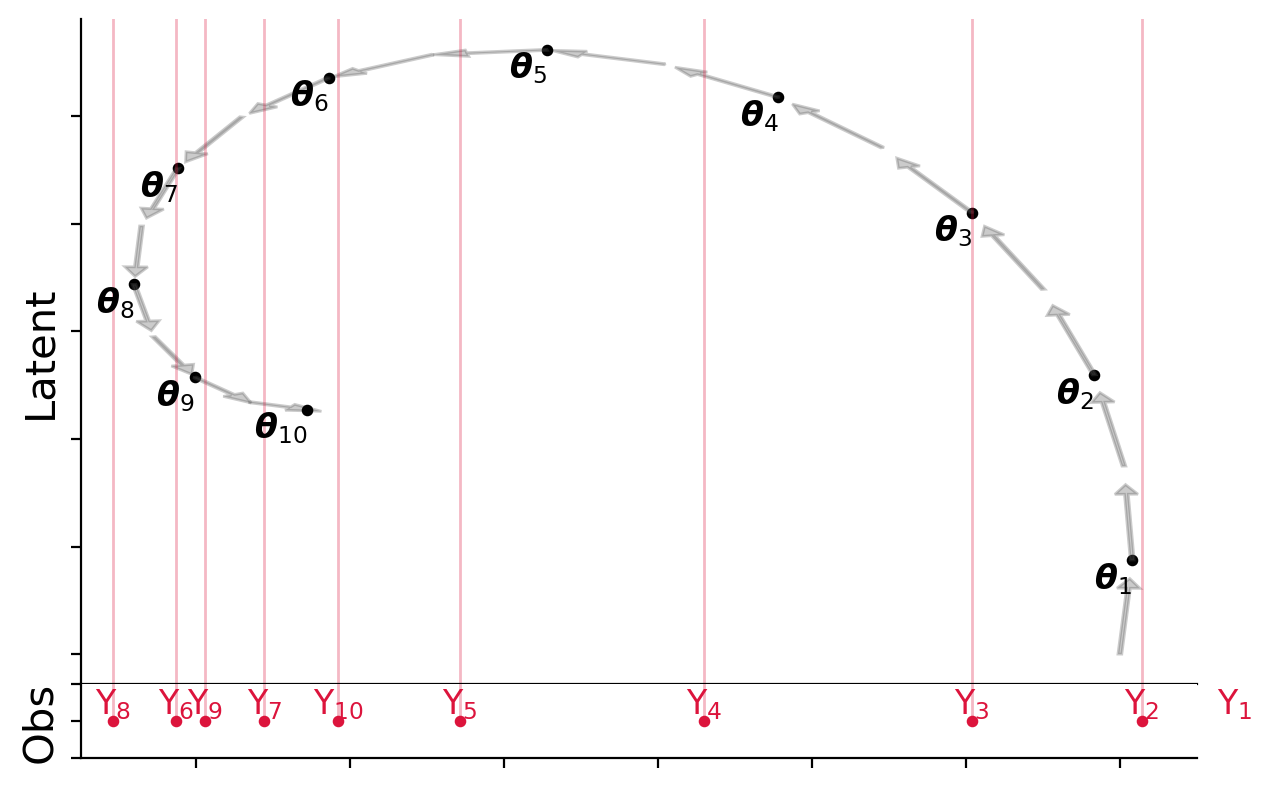

In [124]:
fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(2, 1, height_ratios=[0.9, 0.1], hspace=0.0)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)

animate(20, key=10)

# Linear dynamical system

In [150]:
c0, c1 = sns.color_palette()[:2]

c0 = "#5A5A5A"
c1 = "#DC143C"

custom_lines = [
    Line2D([0], [0], color=c0, lw=2),
    Line2D([0], [0], color=c1, lw=2)
]

In [418]:
T = 5
n_steps = 1000
dt = T / n_steps

F = np.array([
    [1 - dt, -dt],
    [6 * dt, 1 - dt]
])

F = jnp.array([
    [1 - dt + (dt**2) / 2, -dt + (dt**2)],
    [6 * dt - 6 * (dt**2), 1 - dt + (dt**2) / 2]
])


Q = np.eye(2) * 0.001


H = jnp.eye(2)
R = np.eye(2) * 0.001

H = jnp.array([
    [1, .0]
])
R = np.eye(1) * 0.001

In [419]:
def step(theta, key, F, H, dt):
    key_noise, key_dynamics = jax.random.split(key)
    noise = jnp.sqrt(R) @ jax.random.normal(key_noise, (H.shape[0],))
    latent_noise = jnp.sqrt(Q) @ jax.random.normal(key_dynamics, (F.shape[0],))
    theta_new = F @ theta + latent_noise * jnp.sqrt(dt)
    signal = H @ theta_new
    measurement = signal + noise
    return theta_new, (theta_new, signal, measurement)


def simulate(key, latent_init, T, n_steps):
    dt = T / n_steps
    keys = jax.random.split(key, n_steps)
    F = jnp.array([
        [1 - dt + (dt**2) / 2, -dt + (dt**2)],
        [6 * dt - 6 * (dt**2), 1 - dt + (dt**2) / 2]
    ])

    pstep = partial(step, F=F, H=H, dt=dt)
    _, (latent, signal, measurement) = jax.lax.scan(pstep, theta_init, keys)
    return {
        "latent": latent,
        "signal": signal,
        "measurement": measurement
    }

In [450]:
theta_init = jnp.array([1.0, -1.5])
key = jax.random.PRNGKey(314)

T = 3
n_steps = 1000
res = simulate(key, theta_init, T, n_steps)

In [451]:
theta_init

Array([ 1. , -1.5], dtype=float32)

Text(0, 0.5, 'vertical coord.')

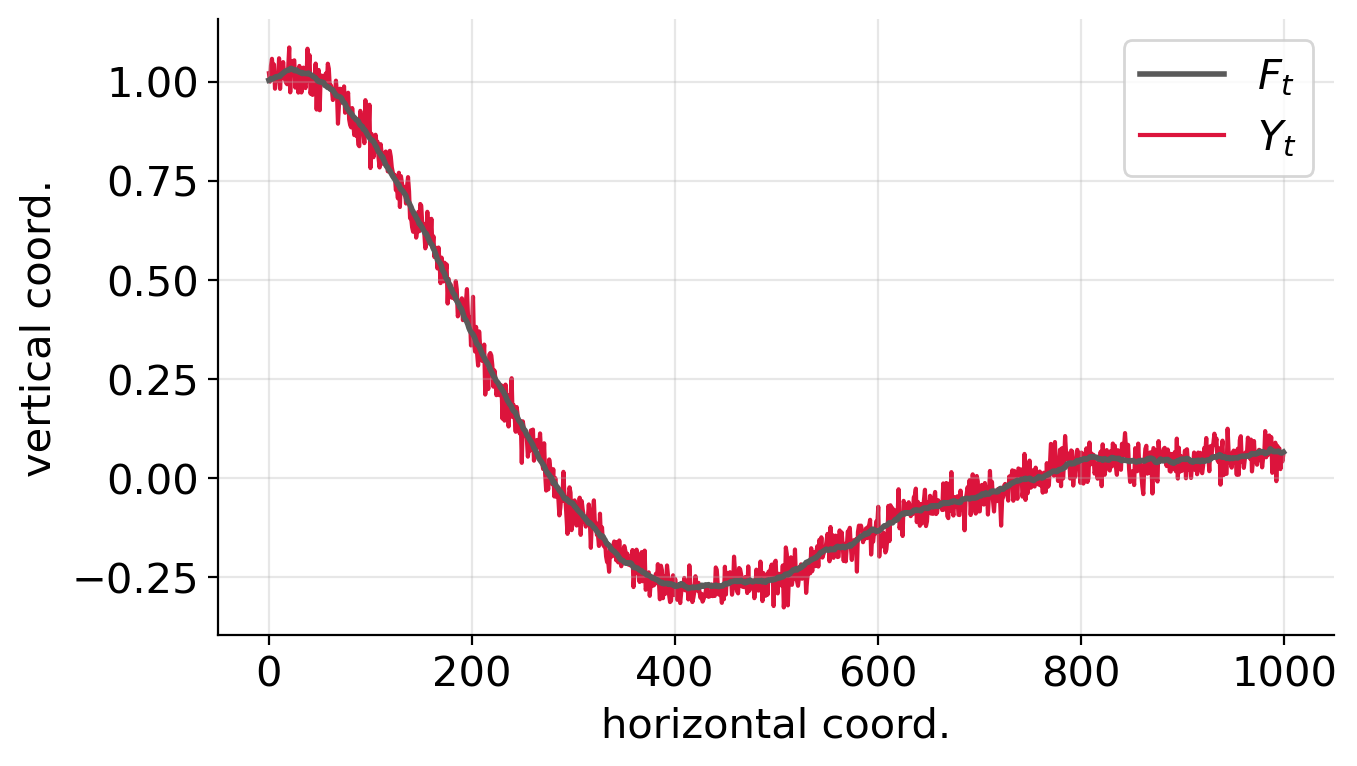

In [452]:
plt.plot(*res["signal"].T, color=c0, linewidth=2, label="$F_t$")
# plt.scatter(*res["measurement"].T, c=c1, alpha=1.0, zorder=0, s=5, label="$Y_t$")
plt.plot(*res["measurement"].T, c=c1, alpha=1.0, zorder=0, label="$Y_t$")
plt.legend()
plt.grid(alpha=0.3)
plt.xlabel("horizontal coord.")
plt.ylabel("vertical coord.")
# plt.savefig("./discrete-dynamical-system-with-obs.png", dpi=200, bbox_inches="tight")

## Filtering!

In [453]:
dt = T / n_steps
F = jnp.array([
    [1 - dt + (dt**2) / 2, -dt + (dt**2)],
    [6 * dt - 6 * (dt**2), 1 - dt + (dt**2) / 2]
])


In [521]:
def predict(bel):
    mu, Sigma = bel
    
    mu = F @ mu
    Sigma = F @ Sigma @ F.T + Q
    bel = mu, Sigma
    
    return bel

def update(bel, obs):
    mu_pred, Sigma_pred = bel

    St = H @ Sigma_pred @ H.T + R
    Kt = jnp.linalg.solve(St, H @ Sigma_pred).T
    mu = mu_pred + Kt @ (obs - H @ mu_pred)
    Sigma = Sigma_pred - Kt @ St @ Kt.T

    bel = (mu, Sigma)
    return bel

In [524]:
def kf_step(bel, obs):
    bel_pred = predict(bel)
    bel = update(bel_pred, obs)

    mu_pred, Sigma_pred = bel_pred

    return bel, (*bel, mu_pred)

In [525]:
yobs = res["measurement"]

bel_init = (theta_init, jnp.eye(2))

(mu_final, Sigma_final), hist = jax.lax.scan(kf_step, bel_init, yobs)

In [526]:
mu_final

Array([0.05686321, 0.00327837], dtype=float32)

In [527]:
Sigma_final

Array([[ 0.00061787, -0.00024835],
       [-0.00024835,  0.13886763]], dtype=float32)

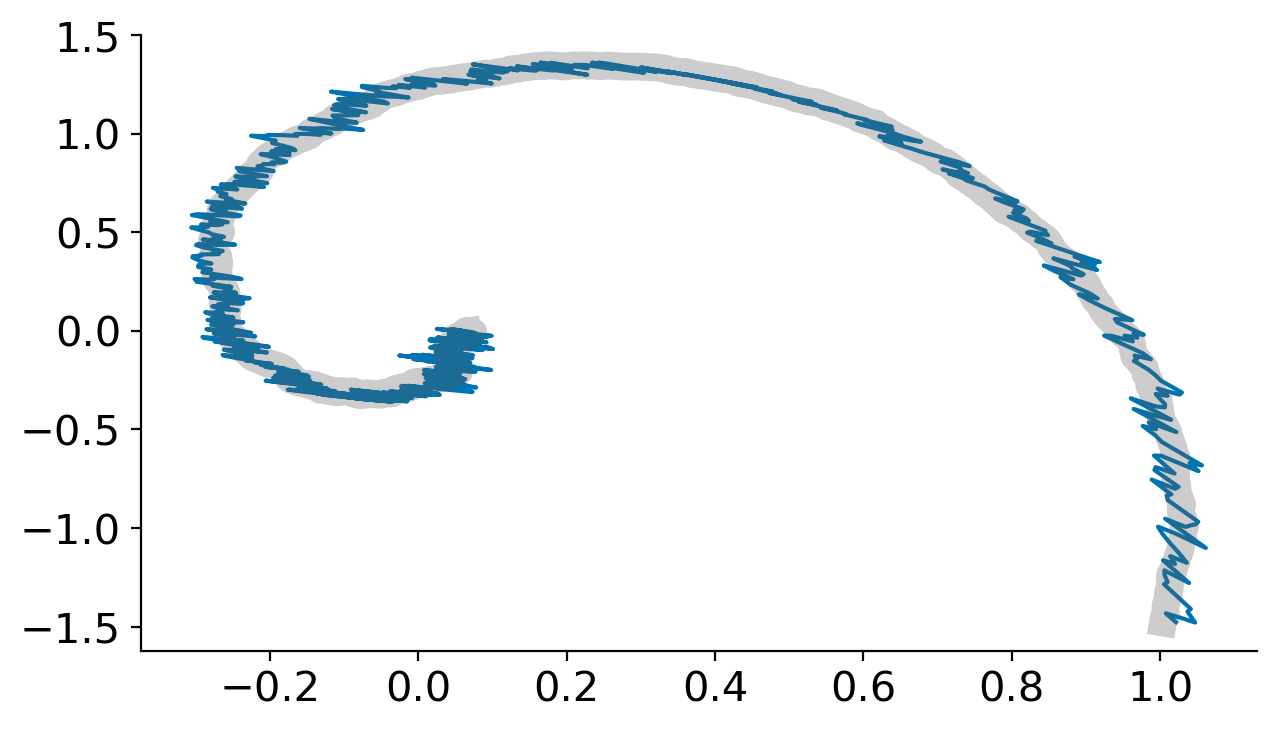

In [528]:
plt.plot(*hist[0].T)
plt.plot(*res["latent"].T, color=c0, linewidth=10, alpha=0.3, label="$F_t$")

In [529]:
X = res["latent"]

(-1.0, 1.0)

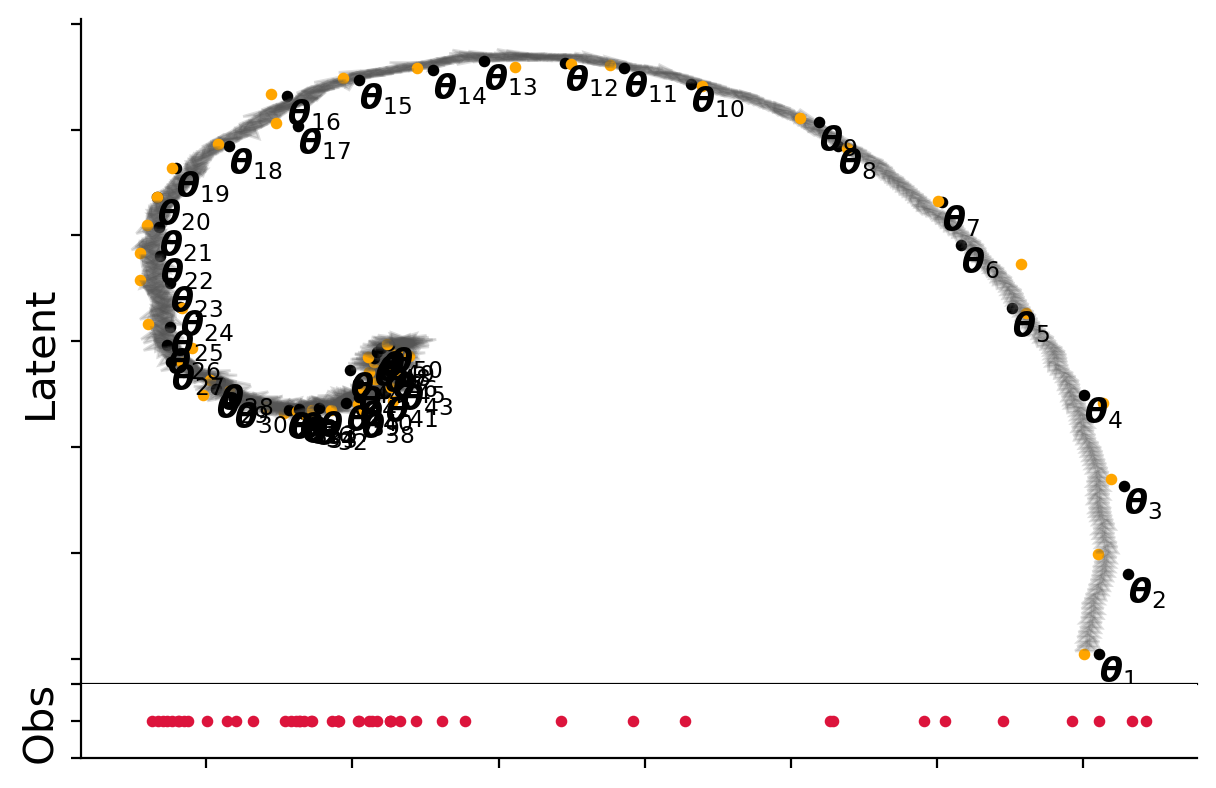

In [538]:
fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(2, 1, height_ratios=[0.9, 0.1], hspace=0.0)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)

ax_top.tick_params(labelbottom=False)
ax_top.tick_params(labelleft=False)
ax_bottom.tick_params(labelbottom=False)
ax_bottom.tick_params(labelleft=False)

ax_bottom.set_ylabel("Obs")
ax_top.set_ylabel("Latent")

np.random.seed(3141)


frames = list(zip(X[:-1], X[1:]))
count = 0
for i, (init, end) in enumerate(frames):
    Δx = end - init
    ax_top.arrow(
        *init, *Δx * 0.7, head_width=0.03, edgecolor=None,
        width=0.005, alpha=0.2, color="#555555"
    )
    pos_noise = yobs[i]
    if i in np.arange(0, len(X), 20):
        count += 1
        hal = "right"
        ax_top.scatter(*hist[0][i], c="black", s=10)
        ax_top.scatter(*hist[2][i], c="orange", s=10)
        ax_bottom.scatter(pos_noise[0], 0, c="crimson", s=10)
        
        # ax_top.axvline(x=pos_noise[0], c="crimson", linewidth=1, alpha=0.3)
        # ax_bottom.axvline(x=pos_noise[0], ymin=0.5, c="crimson", linewidth=1, alpha=0.3)
        
        # ax_top.scatter(*pos_noise, c="crimson", s=10)
        label = r"$\boldsymbol{\theta}_{"f"{count}""}$"
        ax_top.text(*hist[0][i], label,
                 verticalalignment="top",
                 fontsize=12,
                 family="serif",
                 weight="bold"
                )

        # ax_bottom.text(pos_noise[0], 0.01, r"Y$_{"f"{count}""}$",
        #                horizontalalignment="center",
        #                verticalalignment="bottom",
        #                color="crimson",
        #                fontsize=10,)

ax_bottom.set_ylim(-1,1)
# ax_top.grid(alpha=0.3)
# ax_bottom.grid(alpha=0.3)
# plt.axis("off");
# plt.tight_layout()
# plt.savefig("./discrete-dynamical-system.png", dpi=300, bbox_inches="tight")

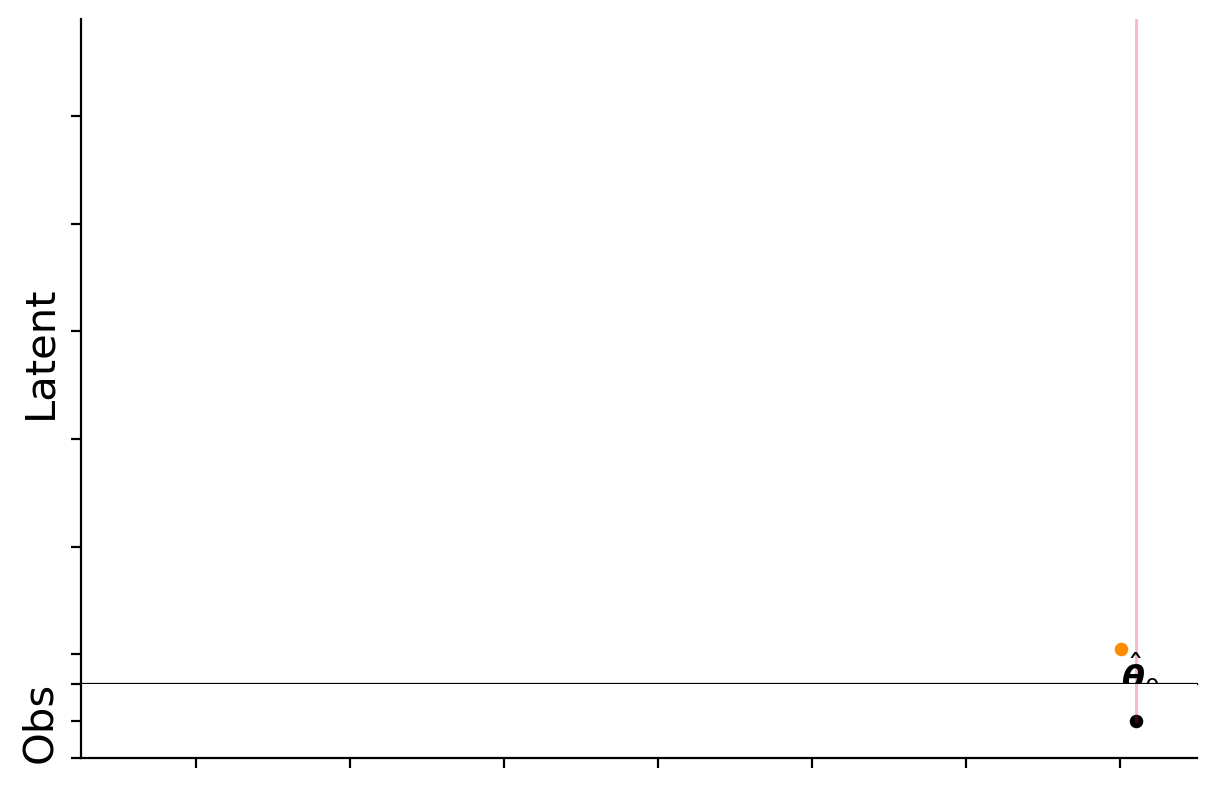

In [539]:
fig = plt.figure(figsize=(7.2, 4.0 * 1.2))
gs = GridSpec(2, 1, height_ratios=[0.9, 0.1], hspace=0.0)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)


def animate(n_frames):
    ax_top.cla()
    ax_bottom.cla()

    ax_top.tick_params(labelbottom=False)
    ax_top.tick_params(labelleft=False)
    ax_bottom.tick_params(labelbottom=False)
    ax_bottom.tick_params(labelleft=False)

    ax_bottom.set_ylabel("Obs")
    ax_top.set_ylabel("Latent")

    
    frames = list(zip(X[:-1], X[1:]))[:n_frames]
    count = 0
    last_valid_index = 0
    for i, (init, end) in enumerate(frames):
        Δx = end - init
        ax_top.arrow(
            *init, *Δx * 0.7, head_width=0.03, edgecolor=None,
            width=0.005, alpha=0.2, color="#555555"
        )
        pos_noise = yobs[i]
        if i in np.arange(0, len(X), 20):
            last_valid_index = i
            count += 1
            hal = "right"
            ax_top.scatter(*hist[0][i], c="black", s=10)
            ax_bottom.scatter(pos_noise[0], 0, c="crimson", s=10)
            
            
            # ax_top.scatter(*pos_noise, c="crimson", s=10)
            # label = r"$\boldsymbol{\theta}_{"f"{count}""}$"
            # ax_top.text(*hist[0][i], label,
            #          horizontalalignment=hal,
            #          verticalalignment="top",
            #          fontsize=12,
            #          family="serif",
            #          weight="bold"
            #         )
    
            # ax_bottom.text(pos_noise[0], 0.01, r"Y$_{"f"{count}""}$",
            #                horizontalalignment="center",
            #                verticalalignment="bottom",
            #                color="crimson",
            #                fontsize=10,)

    ylast = yobs[last_valid_index]
    ax_top.axvline(x=ylast, c="crimson", linewidth=1, alpha=0.3)
    ax_bottom.axvline(x=ylast, ymin=0.5, c="crimson", linewidth=1, alpha=0.3)
    ax_bottom.scatter(ylast, 0, c="black", s=15)
    ax_top.scatter(*hist[2][last_valid_index], c="darkorange", s=15, zorder=10)

    label = r"$\hat{\boldsymbol{\theta}}_{"f"{count}""}$"
    ax_top.text(*hist[2][last_valid_index], label,
             verticalalignment="top",
             fontsize=12,
             family="serif",
             weight="bold"
            )

    
    ax_bottom.set_ylim(-1,1)
    ax_top.set_ylim(-1.64062466, 1.4511007)
    ax_top.set_xlim(-0.35, 1.10)
    ax_bottom.set_xlim(-0.35, 1.10)

frames = np.arange(0, len(X), 10)
animation = FuncAnimation(fig, animate, frames)
animation.save("animation-filtering.gif", fps=5)

### Multiple simulations

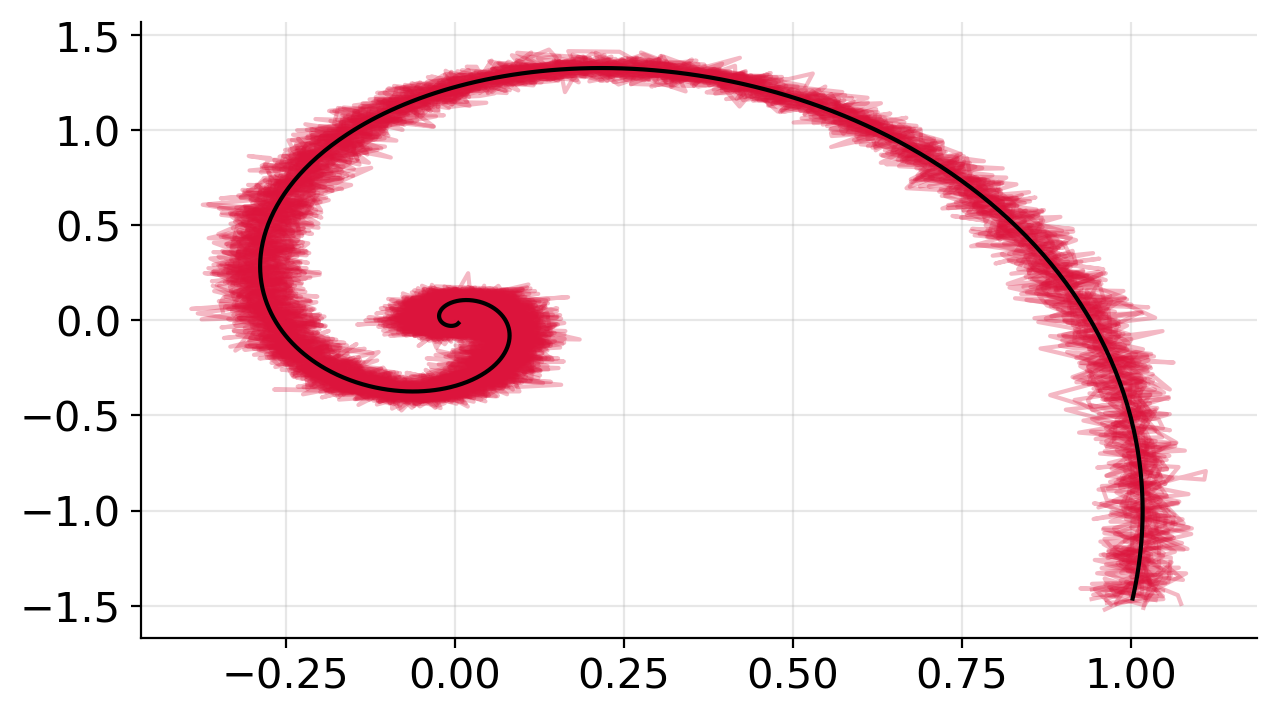

In [133]:
n_sims = 20
key_sims = jax.random.split(key, n_sims)
vsim = jax.vmap(simulate, in_axes=(0, None, None, None))
res = vsim(key_sims, theta_init, T, n_steps)

for sim in res["measurement"]:
    plt.plot(*sim.T, c=c1, alpha=0.3)
plt.plot(*res["signal"][0].T, c="black")
plt.grid(alpha=0.3)

## The error variance-covariance (EVC) matrix

In [134]:
def evc_step(sigma, step, F, H, Q, R):
    """
    Compute the predicted and updated
    error variance covariance matrix (EVC)
    as well as the variance of innovations.
    We assume
        1. fixed projection matrix H,
        2. fixed transition matrix P,
        3. fixed dynamics covariance Q, and
        4. fixed measurement covariance R.
    """
    sigma_pred = F @ sigma @ F.T + Q
    var_innov = H @ sigma_pred @ H.T + R
    K = jnp.linalg.solve(var_innov, H.T @ sigma_pred).T
    sigma_update = sigma_pred - K @ var_innov @ K.T

    out = {
        "sigma_pred": sigma_pred,
        "var_innov": var_innov,
        "sigma": sigma_update,
    }
    return sigma_update, out

def Mfunc(Sigma_pred, var_innov, F, H):
    M = F  - F @ Sigma_pred @ H.T @ var_innov @ H
    return M

In [135]:
Sigma_init = jnp.eye(2)
steps = jnp.arange(n_steps)
stepfn = partial(evc_step, F=F, H=H, Q=Q, R=R)
_, hist_evc = jax.lax.scan(stepfn, Sigma_init, steps)

In [136]:
hist_M = jax.tree.map(partial(Mfunc, F=F, H=H), hist_evc["sigma_pred"], hist_evc["var_innov"])

## Building fundamental covariance matrix

In [137]:
hist_sigma_pred = hist_evc["sigma_pred"]
hist_sigma_update = hist_evc["sigma"]
hist_innov = hist_evc["var_innov"]

In [138]:
def step_fwd(cov, t):
    cov = cov.at[t].set(F @ cov[t-1])
    cov = cov.at[t,t].set(hist_sigma_pred[t])
    return cov, None

In [139]:
# Initialise fundamental covariance
covariance_fundamental = jnp.zeros((n_steps, n_steps, 2, 2))
covariance_fundamental = covariance_fundamental.at[0,0].set(hist_sigma_pred[0])

# fwd pass
steps = jnp.arange(n_steps)
covariance_fundamental, _ = jax.lax.scan(step_fwd, covariance_fundamental, steps)

# backward pass

In [140]:
covariance_fundamental[-2, -2:]

Array([[[ 1.4967515e-10, -1.0134648e-10],
        [-1.0134710e-10,  1.0482605e-09]],

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]]], dtype=float32)

## Smoothing

In [141]:
def step_backward(A, t):
    # Multiply existing terms by M matrix
    A = jnp.einsum("ji,sjk->sik", hist_M[t], A)
    # update current A element
    A = A.at[t+1].set(hist_M[t].T @ H.T)

    cov_fundamental_part = jnp.einsum("ij,sjk->sik", hist_sigma_pred[t], A)
    return A, cov_fundamental_part

In [142]:
# Initialise A marix
A_matrices = jnp.zeros((n_steps, 2, 2))
A_matrices = A_matrices.at[n_steps - 1].set(hist_M[-2].T @ H.T)

steps_backward = np.arange(n_steps-2, -1, -1)

In [143]:
A_final, cov_fundamental_upper = jax.lax.scan(step_backward, A_matrices, steps_backward)

In [ ]:
jnp.einsum("smij->msij", cov_fundamental_upper)[-1, :, 0, 0]

In [145]:
cov_fundamental_upper.shape

(999, 1000, 2, 2)

In [147]:
t = 997

# Multiple A matrices
A_matrices = jnp.einsum("ji,sjk->sik", hist_M[t], A_matrices)

A_matrices = A_matrices.at[t+1].set(hist_M[t].T @ H.T)

In [149]:
jnp.einsum("ij,sjk->sik", hist_sigma_pred[t], A_matrices)

Array([[[ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       ...,

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00]],

       [[ 1.4989368e-10, -9.6572604e-11],
        [-1.0635198e-10,  1.0564131e-09]],

       [[ 1.4962653e-10, -9.1616624e-11],
        [-1.1107721e-10,  1.0479697e-09]]], dtype=float32)